Importo las librerias necesarias, incluyendo las de preprocesamiento, entrenamiento y evaluación.


In [ ]:
import sys

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import (
    StandardScaler
)

from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.ensemble import RandomForestClassifier as rf , GradientBoostingClassifier as gb
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AUTO 2/PROYECTO MODELOS DL/EMG_Features.csv")
df

,RMS_Biceps,MAV_Biceps,VAR_Biceps,ZC_Biceps,IMEG_Biceps,MEANF_Biceps,MDF_Biceps,SPECTRAL_ENT_Biceps,RMS_Triceps,MAV_Triceps,VAR_Triceps,ZC_Triceps,IMEG_Triceps,MEANF_Triceps,MDF_Triceps,SPECTRAL_ENT_Triceps,Target
0,0.000054,0.000046,2.877636e-09,13,0.009216,55.919464,60.0,1.392794,0.000161,0.000133,2.598678e-08,12,0.026583,60.653539,60.0,0.999155,0.0
1,0.000035,0.000026,1.200250e-09,13,0.005259,39.733812,40.0,2.053394,0.000078,0.000057,6.025554e-09,19,0.011488,64.800248,60.0,1.333861,0.0
2,0.000016,0.000013,2.643661e-10,15,0.002686,67.755072,50.0,2.664580,0.000031,0.000024,9.077925e-10,22,0.004893,110.965196,60.0,2.145303,0.0
3,0.000024,0.000016,5.428025e-10,16,0.003242,43.452541,40.0,2.118086,0.000033,0.000028,1.101355e-09,16,0.005670,80.712859,60.0,1.535873,0.0
4,0.000023,0.000015,4.815328e-10,16,0.002972,58.452967,60.0,2.448056,0.000038,0.000034,1.411730e-09,12,0.006775,74.454843,60.0,1.432573,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12413,0.000118,0.000084,1.383804e-08,16,0.016724,44.779334,40.0,2.248886,0.000406,0.000295,1.648139e-07,11,0.058963,73.001348,80.0,2.294145,1.0
12414,0.000072,0.000054,5.112447e-09,19,0.010888,49.540454,30.0,2.211320,0.000290,0.000194,8.184051e-08,11,0.038831,47.272126,50.0,1.968698,1.0
12415,0.000087,0.000069,7.562360e-09,18,0.013798,85.696916,90.0,2.325793,0.000196,0.000146,3.807773e-08,14,0.029117,75.684680,80.0,2.435941,1.0
12416,0.000092,0.000078,8.525652e-09,14,0.015602,80.356192,80.0,2.536613,0.000234,0.000181,5.437050e-08,16,0.036139,52.743481,40.0,2.276363,1.0


Luego de realizar el correspondiente EDA y concluir que es util realizar un PCA, continuamos el proceso y el siguiente paso es separar nuestros datos y crear un pipepline, en el cual hagamos una normalización de los datos y apliquemos el PCA. El pipeline solo tendrá estos pasos ya que la idea es que se aplique a varios modelos.

**DIVISIÓN DE LOS DATOS**

In [ ]:
X = df.drop(columns=['Target'])
y = df['Target']



print(y)


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12413    1.0
12414    1.0
12415    1.0
12416    1.0
12417    1.0
Name: Target, Length: 12418, dtype: float64


In [ ]:
#Hago una división de datos 70-15-15
X_train, X_treinta, y_train, y_treinta = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
    )
X_val, X_test, y_val, y_test = train_test_split(
    X_treinta, y_treinta, test_size=0.50, random_state=42, stratify=y_treinta
)

In [ ]:
print("Tamaños:")
print("Train:", X_train.shape, y_train.shape)
print("Val:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

Tamaños:
Train: (8692, 16) (8692,)
Val: (1863, 16) (1863,)
Test: (1863, 16) (1863,)


**PIPELINE DE PROCESAMIENTO **



In [ ]:


# Pipeline de escalado y el PCA
pipeline_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))   #Para que nos de el 95% de varianza
])

# Ajustar EL PIPELINE con train, se hace solo con este porque como sabemos se puede sesgar
pipeline_pca.fit(X_train)

# Transformar cada conjunto
X_train_pca = pipeline_pca.transform(X_train)
X_val_pca   = pipeline_pca.transform(X_val)
X_test_pca  = pipeline_pca.transform(X_test)

# Varianza explicada
pca = pipeline_pca.named_steps['pca']
print("Varianza explicada por cada componente:")
print(pca.explained_variance_ratio_)

print("\nVarianza explicada acumulada:",
      pca.explained_variance_ratio_.sum())


Varianza explicada por cada componente:
[0.37144445 0.20124968 0.14981568 0.08190279 0.05673402 0.04973711
 0.03248761 0.02660736]

Varianza explicada acumulada: 0.9699787024598475


**ENTRENAMIENTO DE MODELO 1**
Para experimentar un poco con la arquitectura de las redes neuronales profundas, probaaré diferentes cantidades de neuronas en cada capa y así ver cual dió mejor rendimiento.

In [ ]:
import random
# creo una funcion para poder que la arquitectura se pueda repetir
#fijar semillas para reproducibilidad
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

input_dim = X_train_pca.shape[1]

def build_dnn(units1, units2, input_dim, l2_reg=1e-3, dropout_rate=0.3):
    model = Sequential([
        Dense(units1, activation='relu',
              input_shape=(input_dim,),
              kernel_regularizer=regularizers.l2(l2_reg)),
        Dropout(dropout_rate),
        Dense(units2, activation='relu',
              kernel_regularizer=regularizers.l2(l2_reg)),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )
    return model


In [ ]:
# Configuraciones de arquitecturas a probar
arquitecturas = [
    (32, 16),
    (64, 32),
    (128, 64)
]

resultados = {}
historias = {}

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

for units1, units2 in arquitecturas:
    nombre = f"{units1}-{units2}-1"
    print(f"\n Entrenando modelo {nombre}")

    model = build_dnn(units1, units2, input_dim)

    history = model.fit(
        X_train_pca, y_train,
        epochs=100,
        batch_size=16,
        validation_data=(X_val_pca, y_val),
        callbacks=[early_stop],
        verbose=1 # para poder ver las epocas como con las barras y las metricas
    )

    # Evaluar en validación
    val_loss, val_acc, val_auc = model.evaluate(X_val_pca, y_val, verbose=0)

    resultados[nombre] = {
        "val_loss": val_loss,
        "val_acc": val_acc,
        "val_auc": val_auc,
        "model": model
    }
    historias[nombre] = history

    print(f" {nombre} -> val_loss: {val_loss:.4f}, val_acc: {val_acc:.4f}, val_auc: {val_auc:.4f}")



 Entrenando modelo 32-16-1
Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


544/544 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7259 - auc: 0.8034 - loss: 0.5489 - val_accuracy: 0.8894 - val_auc: 0.9560 - val_loss: 0.3123
Epoch 2/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8961 - auc: 0.9486 - loss: 0.3206 - val_accuracy: 0.9082 - val_auc: 0.9655 - val_loss: 0.2711
Epoch 3/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9087 - auc: 0.9539 - loss: 0.2928 - val_accuracy: 0.9157 - val_auc: 0.9696 - val_loss: 0.2525
Epoch 4/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9117 - auc: 0.9593 - loss: 0.2737 - val_accuracy: 0.9184 - val_auc: 0.9723 - val_loss: 0.2414
Epoch 5/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9154 - auc: 0.9622 - loss: 0.2597 - val_accuracy: 0.9195 - val_auc: 0.9741 - val_loss: 0.2307
Epoch 6/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9197 - auc: 0.9664 - loss: 0.2461 - val_accuracy: 0.9275 - val_auc: 0.9757 - val_loss: 0.2220
Epoch 7/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 3m

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


544/544 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7895 - auc: 0.8635 - loss: 0.4909 - val_accuracy: 0.9050 - val_auc: 0.9640 - val_loss: 0.2956
Epoch 2/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9080 - auc: 0.9582 - loss: 0.2992 - val_accuracy: 0.9173 - val_auc: 0.9718 - val_loss: 0.2545
Epoch 3/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9185 - auc: 0.9640 - loss: 0.2648 - val_accuracy: 0.9275 - val_auc: 0.9754 - val_loss: 0.2332
Epoch 4/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9236 - auc: 0.9674 - loss: 0.2474 - val_accuracy: 0.9313 - val_auc: 0.9777 - val_loss: 0.2200
Epoch 5/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9219 - auc: 0.9690 - loss: 0.2393 - val_accuracy: 0.9351 - val_auc: 0.9790 - val_loss: 0.2123
Epoch 6/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9306 - auc: 0.9718 - loss: 0.2249 - val_accuracy: 0.9340 - val_auc: 0.9801 - val_loss: 0.2058
Epoch 7/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2m

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


544/544 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8321 - auc: 0.9195 - loss: 0.4600 - val_accuracy: 0.9179 - val_auc: 0.9692 - val_loss: 0.2923
Epoch 2/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9138 - auc: 0.9643 - loss: 0.2874 - val_accuracy: 0.9281 - val_auc: 0.9755 - val_loss: 0.2494
Epoch 3/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9265 - auc: 0.9680 - loss: 0.2561 - val_accuracy: 0.9345 - val_auc: 0.9783 - val_loss: 0.2236
Epoch 4/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9289 - auc: 0.9719 - loss: 0.2341 - val_accuracy: 0.9372 - val_auc: 0.9803 - val_loss: 0.2120
Epoch 5/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9326 - auc: 0.9722 - loss: 0.2265 - val_accuracy: 0.9404 - val_auc: 0.9815 - val_loss: 0.1993
Epoch 6/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9340 - auc: 0.9742 - loss: 0.2169 - val_accuracy: 0.9404 - val_auc: 0.9820 - val_loss: 0.1970
Epoch 7/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 4m

In [ ]:
print("\n Resumen de resultados en validación:")
for nombre, res in resultados.items():
    print(f"{nombre}: loss={res['val_loss']:.4f}, acc={res['val_acc']:.4f}, auc={res['val_auc']:.4f}")

# Elegir el mejor según AUC (puedes cambiar a 'val_acc' si prefieres)
mejor_nombre = max(resultados, key=lambda k: resultados[k]["val_acc"])
mejor_modelo = resultados[mejor_nombre]["model"]

print(f"\n Mejor modelo según AUC en validación: {mejor_nombre}")



 Resumen de resultados en validación:
32-16-1: loss=0.1664, acc=0.9495, auc=0.9861
64-32-1: loss=0.1646, acc=0.9474, auc=0.9861
128-64-1: loss=0.1698, acc=0.9458, auc=0.9861

 Mejor modelo según AUC en validación: 32-16-1


In [ ]:
test_loss, test_acc, test_auc = mejor_modelo.evaluate(X_test_pca, y_test, verbose=0)
print(f"\n Evaluación en TEST del modelo {mejor_nombre}:")
print(f"test_loss = {test_loss:.4f}, test_acc = {test_acc:.4f}, test_auc = {test_auc:.4f}")



 Evaluación en TEST del modelo 32-16-1:
test_loss = 0.1749, test_acc = 0.9485, test_auc = 0.9820


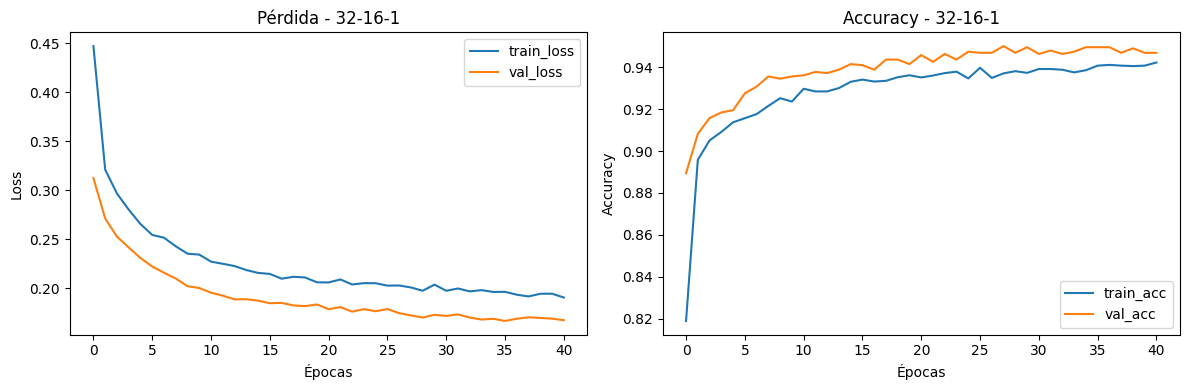

In [ ]:
import matplotlib.pyplot as plt

history = historias[mejor_nombre]

plt.figure(figsize=(12,4))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title(f'Pérdida - {mejor_nombre}')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title(f'Accuracy - {mejor_nombre}')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Ya que en general hubo buenos resultados, comparemos que tan bien está cada arquitectura y cual es el sesgo de cada una, para ello creamos una función que nos entregue un dataframe con esta información:

In [ ]:
import pandas as pd

def evaluar_sesgo_arquitecturas(resultados, X_train, y_train, X_val, y_val):
    """
    resultados: diccionario {nombre_modelo: {"model": modelo_keras, ...}}
    X_train, y_train, X_val, y_val: datasets ya preprocesados (PCA, etc.)
    """
    resumen = []

    for nombre, res in resultados.items():
        model = res["model"]

        # Evaluar en TRAIN
        train_loss, train_acc, train_auc = model.evaluate(
            X_train, y_train, verbose=0
        )

        # Evaluar en VALIDACIÓN
        val_loss, val_acc, val_auc = model.evaluate(
            X_val, y_val, verbose=0
        )

        gap_acc = train_acc - val_acc
        gap_auc = train_auc - val_auc

        resumen.append({
            "arquitectura": nombre,
            "train_loss": train_loss,
            "val_loss": val_loss,
            "train_acc": train_acc,
            "val_acc": val_acc,
            "gap_acc": gap_acc,
            "train_auc": train_auc,
            "val_auc": val_auc,
            "gap_auc": gap_auc
        })

    df_resumen = pd.DataFrame(resumen)

    # Ordenar por gap_auc de mayor a menor (más overfit primero)
    df_resumen = df_resumen.sort_values(by="gap_auc", ascending=False)

    print("Resumen de sesgo (Train vs Validación):\n")
    for _, fila in df_resumen.iterrows():
        nombre = fila["arquitectura"]
        ga = fila["gap_acc"]
        gauc = fila["gap_auc"]

        print(f" {nombre}")
        print(f"   train_acc={fila['train_acc']:.3f} | val_acc={fila['val_acc']:.3f} | gap_acc={ga:.3f}")
        print(f"   train_auc={fila['train_auc']:.3f} | val_auc={fila['val_auc']:.3f} | gap_auc={gauc:.3f}")

        # Interpretación simple del “sesgo”
        if gauc > 0.10:
            print("    Sesgo ALTO hacia train (overfitting fuerte).")
        elif gauc > 0.05:
            print("    Sesgo MODERADO hacia train (algo de overfitting).")
        elif gauc > -0.02:
            print("    Buen balance (generaliza bien).")
        else:
            print("    Posible underfitting o problema raro (val > train).")
        print()

    return df_resumen


Ahora la funcion la aplicamos a nuestro modelo

In [ ]:
df_sesgo = evaluar_sesgo_arquitecturas(
    resultados,
    X_train_pca, y_train,
    X_val_pca, y_val
)

print("\nDataFrame resumen:")
display(df_sesgo)


Resumen de sesgo (Train vs Validación):

 64-32-1
   train_acc=0.951 | val_acc=0.947 | gap_acc=0.003
   train_auc=0.984 | val_auc=0.986 | gap_auc=-0.002
    Buen balance (generaliza bien).

 128-64-1
   train_acc=0.947 | val_acc=0.946 | gap_acc=0.001
   train_auc=0.984 | val_auc=0.986 | gap_auc=-0.003
    Buen balance (generaliza bien).

 32-16-1
   train_acc=0.948 | val_acc=0.950 | gap_acc=-0.002
   train_auc=0.983 | val_auc=0.986 | gap_auc=-0.003
    Buen balance (generaliza bien).


DataFrame resumen:


,arquitectura,train_loss,val_loss,train_acc,val_acc,gap_acc,train_auc,val_auc,gap_auc
1,64-32-1,0.172107,0.164605,0.950759,0.947397,0.003363,0.983762,0.986095,-0.002333
2,128-64-1,0.176770,0.169791,0.947193,0.945786,0.001406,0.983507,0.986085,-0.002579
0,32-16-1,0.176639,0.166408,0.947768,0.949544,-0.001776,0.982713,0.986139,-0.003426


Analizando esta tabla se puede observar que todos tienen:

accuracy en train ~ 0.947 - 0.951

accuracy en val ~ 0.945 - 0.950

auc train ~ 0.983 - 0.984

auc val ~ 0.986

gap_acc y gap_auc muy pequeños, casi que cero.

Con esto podemos concluir que no hay un overfitting perceptible y los medelos generalizan bien.

En base a los resultados de que:
32–16–1 es la mejor elección porque requiere: menos parámetros,tiene igual rendimiento, tiene un menor riesgo de overfitting futuro y es más rápido para entrenar y desplegar. Usaremos este como modleo base para: pruebas adicionales, tuning fino (dropout, L2, batch_size), curvas ROC y pruebas en producción


**SIGUIENTE PROCESO: **
Pruebas adicionales: probamos variaciones pequeñas de arquitectura y parámetros.

Tuning fino automatizado: buscar el mejor Dropout, L2, batch size, learning rate.

Curvas ROC completísimas: train, val, test.

Preparación para producción: guardar modelo, pipeline, umbral óptimo, etc.

In [ ]:
#Arquitectura base
input_dim = X_train_pca.shape[1]

def build_base_model(
    units1=32,
    units2=16,
    dropout_rate=0.3,
    l2_reg=1e-3,
    lr=1e-3
):
    model = Sequential([
        Dense(units1, activation='relu',
              input_shape=(input_dim,),
              kernel_regularizer=regularizers.l2(l2_reg)),
        Dropout(dropout_rate),
        Dense(units2, activation='relu',
              kernel_regularizer=regularizers.l2(l2_reg)),
        Dense(1, activation='sigmoid')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )

    return model


In [ ]:
#Hacemos un prueba manual cambiando hiperparametros
import numpy as np

configs = []
resultados_tuning = []

dropouts = [0.1, 0.2, 0.3, 0.4]  #estas tres lineas de codigo establecen los hiperparametros que vamos a cambiar
l2s = [1e-4, 3e-4, 1e-3]
batches = [8, 16, 32]

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

for d in dropouts:
    for l2 in l2s:
        for bs in batches:

            model = build_base_model(
                dropout_rate=d,
                l2_reg=l2
            )

            history = model.fit(
                X_train_pca, y_train,
                epochs=80,
                batch_size=bs,
                validation_data=(X_val_pca, y_val),
                callbacks=[early_stop],
                verbose=0
            )

            val_loss, val_acc, val_auc = model.evaluate(
                X_val_pca, y_val, verbose=0
            )

            resultados_tuning.append({
                "dropout": d,
                "l2": l2,
                "batch": bs,
                "val_loss": val_loss,
                "val_acc": val_acc,
                "val_auc": val_auc,
                "model": model
            })

            print(f"Test → d={d}, l2={l2}, batch={bs} | AUC={val_auc:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test → d=0.1, l2=0.0001, batch=8 | AUC=0.9865


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test → d=0.1, l2=0.0001, batch=16 | AUC=0.9875


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test → d=0.1, l2=0.0001, batch=32 | AUC=0.9866


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test → d=0.1, l2=0.0003, batch=8 | AUC=0.9859


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test → d=0.1, l2=0.0003, batch=16 | AUC=0.9870


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test → d=0.1, l2=0.0003, batch=32 | AUC=0.9860


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test → d=0.1, l2=0.001, batch=8 | AUC=0.9863


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KeyboardInterrupt: 